<a href="https://colab.research.google.com/github/ImHyunSeok/lim_in_aiffel5th/blob/main/opencv%EB%A1%9C%20%EB%8F%8C%EB%A0%A4%EB%B3%B8%EA%B2%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

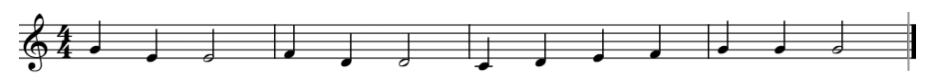

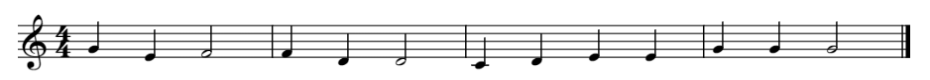

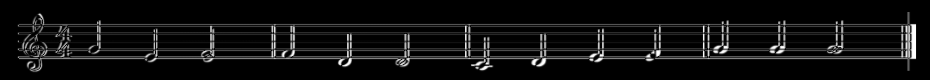

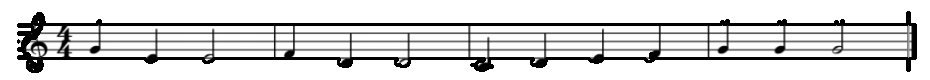

In [2]:
import cv2
from google.colab.patches import cv2_imshow

def find_score_differences(actual_score_path, performed_score_path):
    # Load the actual and performed scores as images
    actual_score = cv2.imread(actual_score_path, cv2.IMREAD_GRAYSCALE)
    performed_score = cv2.imread(performed_score_path, cv2.IMREAD_GRAYSCALE)

    # Resize the images
    target_width = 930
    target_height = 80
    actual_score = cv2.resize(actual_score, (target_width, target_height))
    performed_score = cv2.resize(performed_score, (target_width, target_height))

    # Compute absolute difference between the two images
    difference_image = cv2.absdiff(actual_score, performed_score)

    # Threshold the difference image to highlight changes
    _, thresholded_image = cv2.threshold(difference_image, 30, 255, cv2.THRESH_BINARY)

    # Find contours of the differences
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw rectangles around the differences
    diff_image_with_boxes = actual_score.copy()
    cv2.drawContours(diff_image_with_boxes, contours, -1, (0, 0, 255), 2)

    # Show the images with differences
    cv2_imshow(actual_score)
    cv2_imshow(performed_score)
    cv2_imshow(difference_image)
    cv2_imshow(diff_image_with_boxes)

# Paths to actual and performed scores
actual_score_path = '/content/악보1.PNG'
performed_score_path = '/content/악보2.PNG'

# Call the function to find and visualize the differences
find_score_differences(actual_score_path, performed_score_path)
